<a href="https://colab.research.google.com/github/woaixuexi2023/D2L--Module2--HW1/blob/main/GAN(keras)_to_generate_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import gdown

In [ ]:
#Use mountain drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Navigate the direction where the file located
%cd /content/drive/MyDrive/Cats/cats

/content/drive/MyDrive/Cats/cats


In [ ]:
#check the file 
!ls

CAT_00	CAT_01	CAT_02	CAT_03	CAT_04	CAT_05


In [ ]:
dataset_path = '../cats'

In [ ]:
dataset = keras.utils.image_dataset_from_directory(
    dataset_path, label_mode=None, image_size=(64, 64), batch_size=32
)
dataset = dataset.map(lambda x: x / 255.0)#8609 files

Found 17609 files belonging to 1 classes.


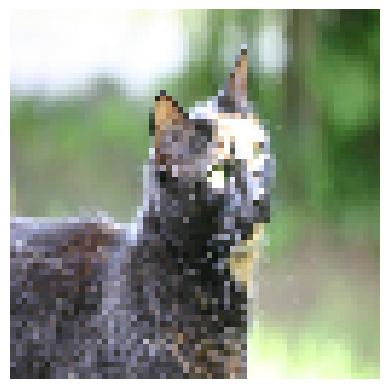

In [ ]:
#Display a sample image
for x in dataset:
    plt.axis("off")
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    break

In [ ]:
````
#Discriminator model
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)            

In [ ]:
#Improved discriminator by adding two more hidden layers
# Create the discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, kernel_size=4, strides=1, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(256, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(512, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        1568      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       131200    
                                                     

In [ ]:
````
#Generator model
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 256)       0 

In [ ]:
````
#improved generator model(change the acitivation function to tahn(), and add batchnormalization())
latent_dim = 128

from keras.layers import BatchNormalization

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        BatchNormalization(),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        BatchNormalization(),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        BatchNormalization(),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="tanh"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 32, 32, 256)      52

In [ ]:
# Create the generator by adding more hidden layer with tahn() and BatchNormalization()
latent_dim = 128
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 512),
        layers.Reshape((8, 8, 512)),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(64, kernel_size=4, strides=1, padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", activation="tanh"),
    ],
    name="generator",
    )
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32768)             4227072   
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 512)        2048      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      2097408   
 nspose)                                                         
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 256)      10

In [ ]:
#train step
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

In [ ]:
#Create a callback that periodically saves generated images
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_%03d_%d.png" % (epoch, i))

In [ ]:
import os
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)#have the samples saved

In [ ]:
#train the model
````
epochs = 900  # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim)]
)

Epoch 1/900
270/270 [==============================] - 780s 3s/step - d_loss: 0.4594 - g_loss: 9.5327
Epoch 2/900
270/270 [==============================] - 24s 88ms/step - d_loss: 0.4932 - g_loss: 5.1552
Epoch 3/900
270/270 [==============================] - 24s 88ms/step - d_loss: 0.3436 - g_loss: 2.5606
Epoch 4/900
270/270 [==============================] - 24s 86ms/step - d_loss: 0.3866 - g_loss: 2.8286
Epoch 5/900
270/270 [==============================] - 24s 87ms/step - d_loss: 0.4249 - g_loss: 2.8886
Epoch 6/900
270/270 [==============================] - 24s 86ms/step - d_loss: 0.4975 - g_loss: 2.5480
Epoch 7/900
270/270 [==============================] - 25s 89ms/step - d_loss: 0.4142 - g_loss: 3.5943
Epoch 8/900
270/270 [==============================] - 24s 86ms/step - d_loss: 0.4508 - g_loss: 2.8744
Epoch 9/900
270/270 [==============================] - 24s 88ms/step - d_loss: 0.4286 - g_loss: 2.7439
Epoch 10/900
270/270 [==============================] - 24s 86ms/step - d_

In [ ]:

# List all files in the current directory
files = os.listdir('../cats')



# Filter for image files with the "png" extension
image_files = [f for f in files if f.endswith(".png")]

# Print the filenames
print(image_files)


['generated_img_800_1.png', 'generated_img_800_2.png', 'generated_img_800_3.png', 'generated_img_800_4.png', 'generated_img_800_5.png', 'generated_img_800_6.png', 'generated_img_800_7.png', 'generated_img_800_8.png', 'generated_img_800_9.png', 'generated_img_801_0.png', 'generated_img_801_1.png', 'generated_img_801_2.png', 'generated_img_801_3.png', 'generated_img_801_4.png', 'generated_img_801_5.png', 'generated_img_801_6.png', 'generated_img_801_7.png', 'generated_img_801_8.png', 'generated_img_801_9.png', 'generated_img_802_0.png', 'generated_img_802_1.png', 'generated_img_802_2.png', 'generated_img_802_3.png', 'generated_img_802_4.png', 'generated_img_802_5.png', 'generated_img_802_6.png', 'generated_img_802_7.png', 'generated_img_802_8.png', 'generated_img_802_9.png', 'generated_img_803_0.png', 'generated_img_803_1.png', 'generated_img_803_2.png', 'generated_img_803_3.png', 'generated_img_803_4.png', 'generated_img_803_5.png', 'generated_img_803_6.png', 'generated_img_803_7.png', 

In [ ]:
img1 = plt.imread('generated_img_171_6.png')


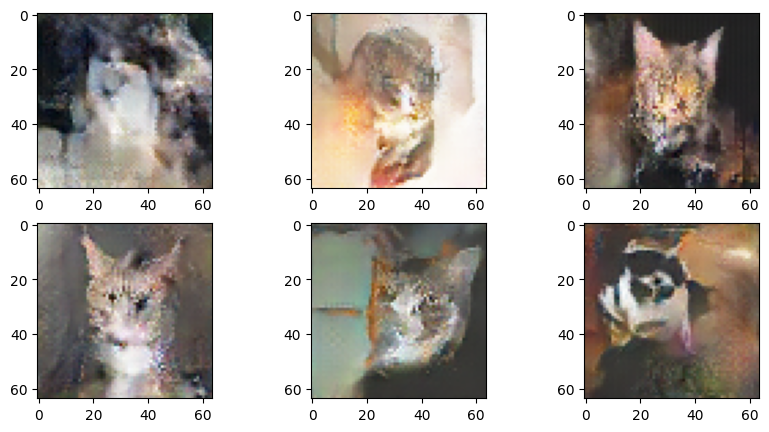

In [ ]:
#Display several images 
import matplotlib.pyplot as plt

# Load the generated images
img1 = plt.imread('generated_img_171_6.png')
img2 = plt.imread('generated_img_848_8.png')
img3 = plt.imread('generated_img_867_6.png')
img4 = plt.imread('generated_img_873_5.png')
img5 = plt.imread('generated_img_832_1.png')
img6 = plt.imread('generated_img_249_6.png')


# Create subplots and display images
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0, 0].imshow(img1)
axs[0, 1].imshow(img2)
axs[0, 2].imshow(img3)
axs[1, 0].imshow(img4)
axs[1, 1].imshow(img5)
axs[1, 2].imshow(img6)
plt.show()


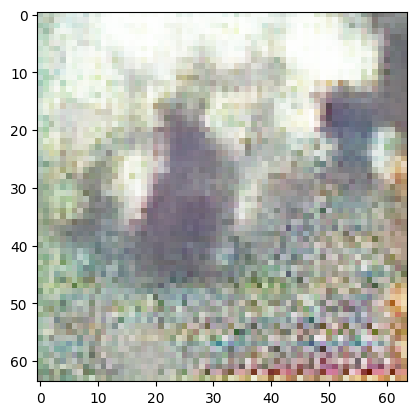

In [ ]:
import matplotlib.pyplot as plt

# Load the generated image
img = plt.imread('generated_img_099_1.png')

# Show the image
plt.imshow(img)
plt.show()

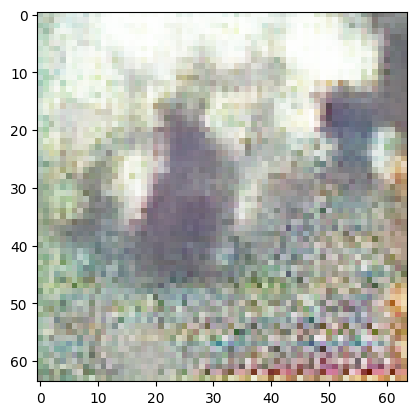

In [ ]:
import matplotlib.pyplot as plt

# Load the generated image
img = plt.imread('generated_img_099_1.png')

# Show the image
plt.imshow(img)
plt.show()

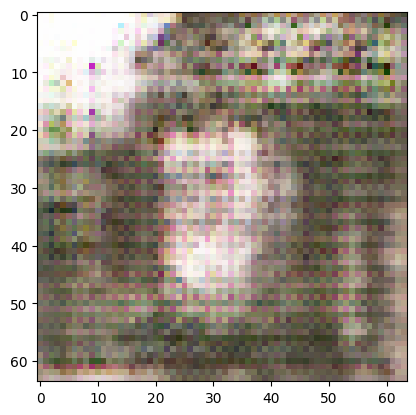

In [ ]:
````#second time 100 epochs
import matplotlib.pyplot as plt

# Load the generated image
img = plt.imread('generated_img_099_1.png')

# Show the image
plt.imshow(img)
plt.show()

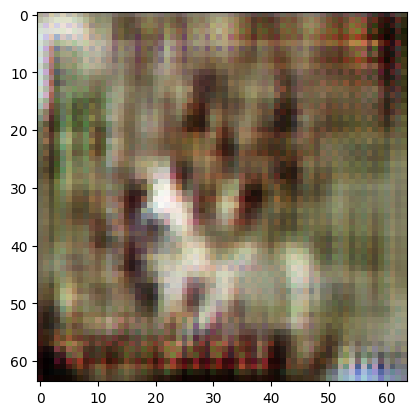

In [ ]:
````#first time 100 epochs
import matplotlib.pyplot as plt

# Load the generated image
img = plt.imread('generated_img_037_1.png')

# Show the image
plt.imshow(img)
plt.show()
